
# **American Multinational Retail Corportaion (W*******mart)**
<hr>

##### -- **The retail corportaion** in the context of case study will be called as **store**. 

-- This store has more than 100 million customers worldwide.

-- Questions on confidence interval and central limit theorem (CLT)

##### 

### Dataset and features

User_ID:	User ID <br>
Product_ID:	Product ID <br>
Gender:	Sex of User <br>
Age:	Age in bins <br>
Occupation:	Occupation(Masked) <br>
City_Category:	Category of the City (A,B,C) <br>
StayInCurrentCityYears:	Number of years stay in current city <br>
Marital_Status:	Marital Status <br>
ProductCategory:	Product Category (Masked) <br> 
Purchase:	Purchase Amount <br>

##### 

# **Simplifying the problem statement**

The store management team wants to understand the purchase behaviour separately for males and females. 

Do they have different spending habits? Do women tend of spend more on Black Friday than?

The management would like to leverage this transactional data of the customers (collected on Black Friday) to learn some business insights as well as actionable items!

It is important to understand that the analysis will be done on the sample data and that will be used to draw inferences about the population. The purchase column is the dependent variable and the rest are independent variables.


$\color{blue}{\text{The datatypes look proper. All the expected numerical values are int and strings are object}}$

$ \color{blue} {1. c = \sqrt{a^2 + b^2} sdf \\ 2. fasdf\\ asdfds}$

##### 

##### 

# Imports

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [57]:
sns.set_context('talk')

##### 

# Data loading and basic exploratory analysis

##### df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')

In [11]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [12]:
df.shape

(550068, 10)

In [15]:
## checking if there are any missing values in the data

df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [29]:
## converting the user_id, marital status, occupation, product_catergory to  categorical variables.

df['User_ID'] = df['User_ID'].astype(str)
df['Marital_Status'] = df['Marital_Status'].astype(str)
df['Occupation'] = df['Occupation'].astype(str)
df['Product_Category'] = df['Product_Category'].astype(str)

##### 

### Insights

- $\color{blue}{\text{There are about 5.5 lakh (500k) records and 10 columns in the dataset.}}$
- $\color{blue}{\text{There are no missing values in the data.}}$

- $\color{blue}{\text{User_ID, Marital_Status, Occupation, Product_Catergory are converted to categorical variables as it makes more sense.}}$

- $\color{blue}{\text{Product_ID, Gender, Age, City_Category, Stay_In_Current_City_Years are originally defined as objects in the data.}}$

- $\color{blue}{\text{Purchase is the only numerical column after the datatype conversion.}}$

##### 

### Describing the data + unique values + value counts of selected variables

In [34]:
## data information after the datatype conversion

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


##### 

In [144]:
df.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [147]:
len(df.groupby(['User_ID', 'Product_ID']))

550068

### **It is clear that the level of data is not user_id but the data is unique at User_ID and Product_ID level. See the above length of the groupby command which matches the length of the data.**

As a result, the data will grouped at the User_ID level to obtain insights on individuals. Product_ID, Occupation, Product_Category will be dropped for now in the df_user. 

In [153]:
df_user = df.groupby('User_ID').agg({'Gender':np.max, 'Age':np.min, 'City_Category':np.max, 'Marital_Status':np.max, 'Purchase':sum}).reset_index()

df_user

,User_ID,Gender,Age,City_Category,Marital_Status,Purchase
0,1000001,F,0-17,A,0,334093
1,1000002,M,55+,C,0,810472
2,1000003,M,26-35,A,0,341635
3,1000004,M,46-50,B,1,206468
4,1000005,M,26-35,A,1,821001
...,...,...,...,...,...,...
5886,1006036,F,26-35,B,1,4116058
5887,1006037,F,46-50,C,0,1119538
5888,1006038,F,55+,C,0,90034
5889,1006039,F,46-50,B,1,590319


In [169]:
##### Getting the basic statistics of the numerical data
df_user.describe().round(2)

,Purchase
count,5891.00
mean,865016.59
std,943644.54
min,46681.00
25%,237678.00
50%,521213.00
75%,1119249.50
max,10536909.00


##### 

In [167]:
df_user.describe(include='object')

,User_ID,Gender,Age,City_Category,Marital_Status
count,5891,5891,5891,5891,5891
unique,5891,2,7,3,2
top,1003202,M,26-35,C,0
freq,1,4225,2053,3139,3417


##### 

In [159]:
df_user['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

In [160]:
df_user['Gender'].value_counts(normalize=True)*100

M    71.719572
F    28.280428
Name: Gender, dtype: float64

##### 

In [161]:
df_user['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

##### 

In [162]:
df_user['Marital_Status'].value_counts()

0    3417
1    2474
Name: Marital_Status, dtype: int64

In [163]:
df_user['Marital_Status'].value_counts(normalize=True)*100

0    58.003735
1    41.996265
Name: Marital_Status, dtype: float64

##### 

In [164]:
df_user['City_Category'].value_counts()

C    3139
B    1707
A    1045
Name: City_Category, dtype: int64

In [165]:
df_user['City_Category'].value_counts(normalize=True)*100

C    53.284672
B    28.976405
A    17.738924
Name: City_Category, dtype: float64

##### 

### Insights (based on the grouped df on the basis of user_id)

- $\color{blue}{\text{Two genders (~72% males and ~28% females) are present.}}$

- $\color{blue}{\text{All the 5891 customers or ~500k transaction records are divided among 7 age groups.}}$

- $\color{blue}{\text{About 58% are unmarried and 42% are married individuals in the data (assuming status 1 denotes married and 0 as unmarried.)}}$

- $\color{blue}{\text{The information comes from customers living in 3 cities.}}$

##### 

# Amount spent **per transaction** vs gender

#### **Here the original df is used as the analysis is needed per transaction**. 
The combination of user_id and product_id is considered as one transaction.

In [170]:
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422


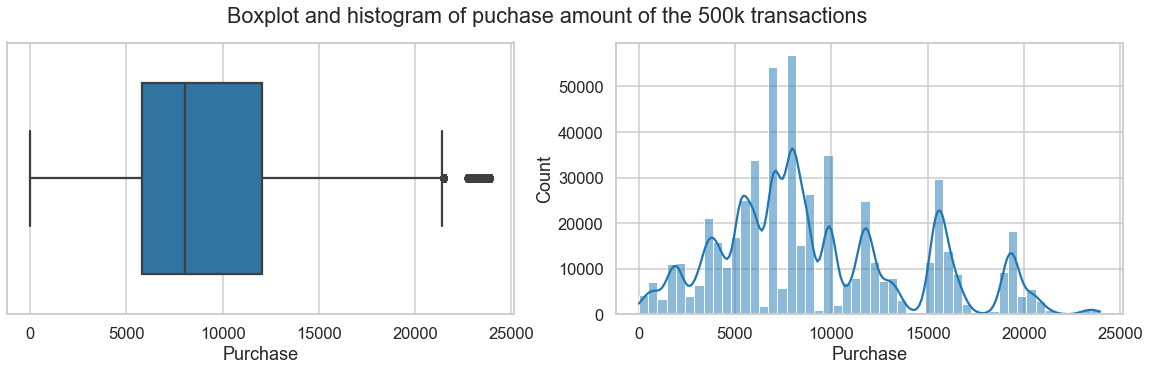

In [177]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,5))
plt.suptitle('Boxplot and histogram of puchase amount of the 500k transactions')
sns.boxplot(x = df['Purchase'],width=0.7, ax=ax1,)
sns.histplot(df['Purchase'], bins=50, kde=True, ax=ax2)
plt.show()

In [180]:
## Average amount spent by males and females per transaction

df.groupby('Gender')['Purchase'].agg([np.mean, np.std, min, max, np.median]).round(2)

,mean,std,min,max,median
Gender,,,,,
F,8734.57,4767.23,12,23959,7914
M,9437.53,5092.19,12,23961,8098


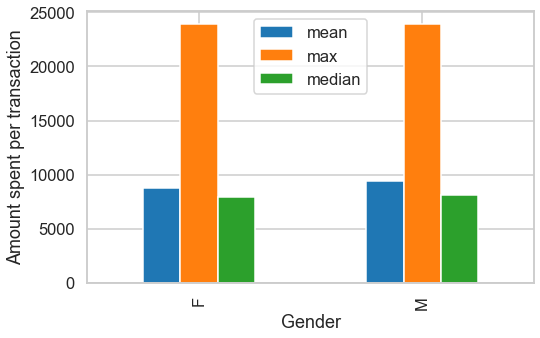

In [192]:
df.groupby('Gender')['Purchase'].agg([np.mean, max, np.median]).round(2).plot(kind='bar', figsize=(8,5))
plt.ylabel('Amount spent per transaction')
plt.show()

##### 

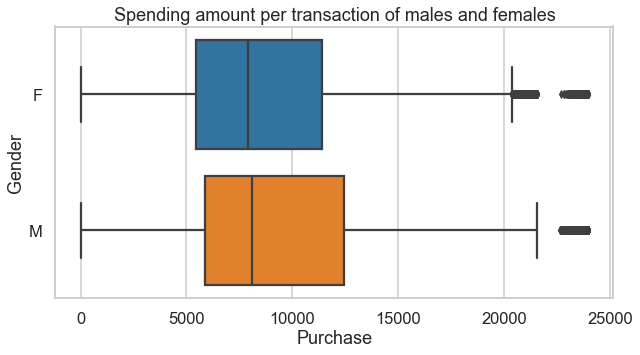

In [190]:
plt.figure(figsize=(10,5))
sns.boxplot(data = df, x = 'Purchase', y='Gender',)
plt.title('Spending amount per transaction of males and females')
plt.show()

### Insights

- $\color{blue}{\text{Males are spending more per transaction than females on an average because the mean (M - \$$9400, F - \$$8700) and median (M - \$$8100, F - \$$7900) are both higher for males per transaction.}}$

- $\color{blue}{\text{There are a few outlies in the dependent variable indicating amount of USD spent per transaction.}}$

##### 

# Computing confidence intervals

#### **Creating bootstrapped data for computing confidence interval for purchase per transaction for males and females**

In [242]:
# df.groupby(['Gender'])['Purchase']

In [198]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [223]:
df.groupby('Gender')['Purchase'].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

In [201]:
## getting a df that contains on transactions by males
df_males = df[df['Gender'] == 'M']

##### 

##### **Approach for creating the bootstrapped data**

1. Take a random sample of size 100 from the dataframe with from purchases by males only (df_males).

2. Calculate the mean of the above sample and store it in a list.

3. Repeat 1 and 2 for 10000 times.

4. Plot the distribution of means obtained in 3. This distribution is called as the sampling distribution of the sample means. It will be approximately normal according to the central limit theorem.

5. In order to calculate the means, the forloop is run below and later a function will be created out of it.


##### 

## **For males**

In [210]:
bootstrapped_means_per_transaction_males = []
for i in range(10000):
    bootstrapped_sample_per_transaction_for_males = np.random.choice(df_males['Purchase'], size=100)
    bootstrapped_sample_mean_per_transaction_for_males = np.mean(bootstrapped_sample_per_transaction_for_males)
    bootstrapped_means_per_transaction_males.append(bootstrapped_sample_mean_per_transaction_for_males)

In [214]:
len(bootstrapped_means_per_transaction_males)

10000

### sampling distribution of the sample means

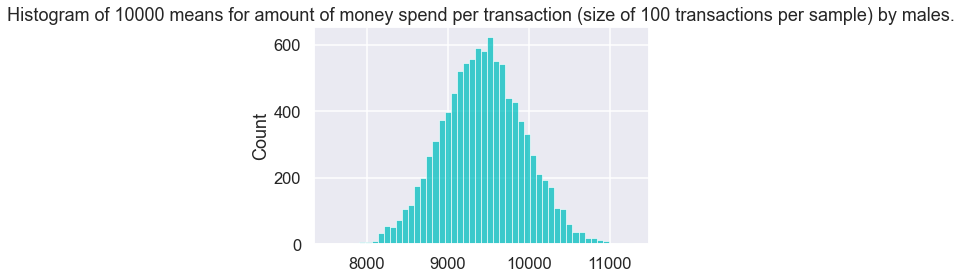

In [549]:
sns.histplot(bootstrapped_means_per_transaction_males, bins=50, color='c')
plt.title('Histogram of 10000 means for amount of money spend per transaction (size of 100 transactions per sample) by males.')
plt.show()

In [220]:
np.mean(bootstrapped_means_per_transaction_males)

9431.849878

## **For females**

### Bootstrapping function to calculate means

In [243]:
def bootstrapped_list_of_mean(column, size_of_each_sample=100, number_of_times_to_sample=10000):
    
    """Returns a list of sampling means"""
    
    bootstrapped_means_list_per_sample_drawn = []
    
    for i in range(number_of_times_to_sample):
        
        bootstrapped_sample_per_draw = np.random.choice(column, size=size_of_each_sample)
        
        bootstrapped_sample_mean_per_draw = np.mean(bootstrapped_sample_per_draw)
        
        bootstrapped_means_list_per_sample_drawn.append(bootstrapped_sample_mean_per_draw)
    
    return bootstrapped_means_list_per_sample_drawn

In [256]:
df_females = df[df['Gender'] == 'F']

In [257]:
bootstrapped_means_per_transaction_females = bootstrapped_list_of_mean(column=df_females['Purchase'], size_of_each_sample=100, number_of_times_to_sample=10000)

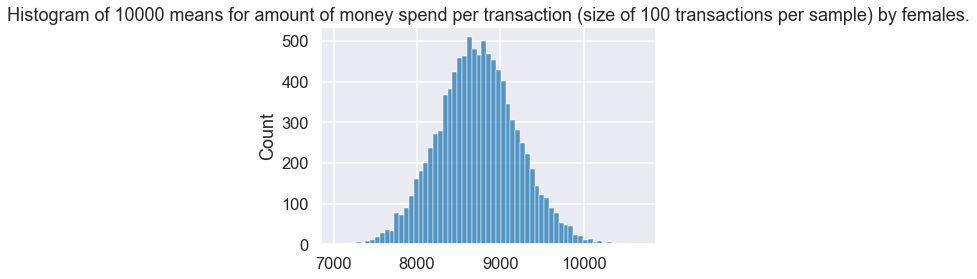

In [550]:
sns.histplot(bootstrapped_means_per_transaction_females)
plt.title('Histogram of 10000 means for amount of money spend per transaction (size of 100 transactions per sample) by females.')
plt.show()

In [260]:
np.mean(bootstrapped_means_per_transaction_females)

8733.813205

## Changing the sample size to compute the means

Here, the column df['purchase'] for males and females will be considered. 

For each iteration, the number of samples will increase by 1 to calculate the sample mean. 

In [356]:
df_males.shape

(414259, 10)

##### There are some ouliers in the purchase of males and females so considering only the 5th and 95th percentile to see the effect of sample size, otherwise the mean will be affected.

In [410]:
## Males
high_m = np.percentile(df_males['Purchase'], 95)
low_m = np.percentile(df_males['Purchase'], 5)

## Females
high_f = np.percentile(df_females['Purchase'], 95)
low_f = np.percentile(df_females['Purchase'], 5)

In [411]:
males_size_effect_df = df_males[(df_males['Purchase']>low_m) & (df_males['Purchase']<high_m)]

females_size_effect_df = df_females[(df_females['Purchase']>low_f) & (df_females['Purchase']<high_f)]

In [412]:
males_size_effect_df['Purchase'].mean()

9290.503712267111

In [413]:
females_size_effect_df['Purchase'].mean()

8523.324485537782

In [559]:
sample_mean_males = []
for i in range(5, 10000):
    sample = np.random.choice(males_size_effect_df['Purchase'], size=i)
    sample_mean = np.mean(sample)
    sample_mean_males.append(sample_mean)


sample_mean_females = []
for i in range(5, 10000):
    sample = np.random.choice(females_size_effect_df['Purchase'], size=i)
    sample_mean = np.mean(sample)
    sample_mean_females.append(sample_mean)

In [556]:
# sns.set_style('darkgrid',)

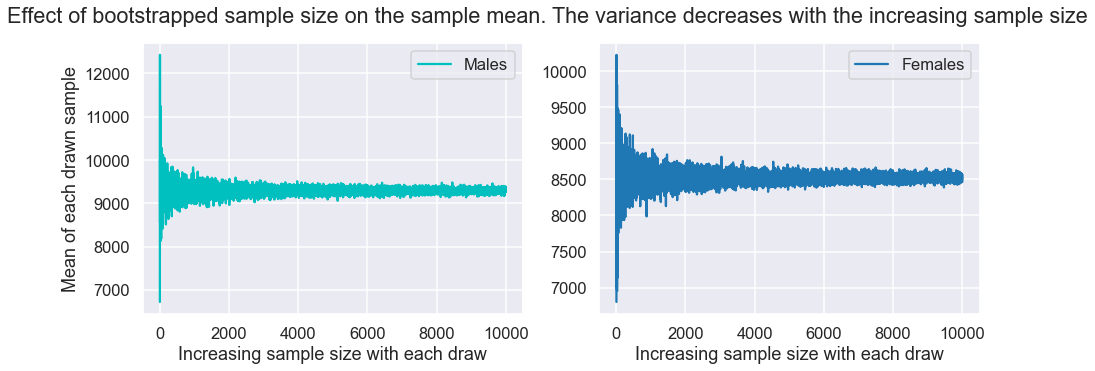

In [560]:
fig,(ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
plt.suptitle('Effect of bootstrapped sample size on the sample mean. The variance decreases with the increasing sample size')

ax1.plot(list(range(5, 10000)),sample_mean_males, label='Males', color='c')
ax1.set_xlabel('Increasing sample size with each draw')
ax1.set_ylabel('Mean of each drawn sample')
ax1.legend()

ax2.plot(list(range(5, 10000)),sample_mean_females, label = 'Females')
ax2.set_xlabel('Increasing sample size with each draw')
ax2.legend()

plt.show()

##### 

## Histogram of sample means with 10000 bootstrapped samples, with different sample sizes.

-- Each time x number of samples are drawn for 10000 times and the distribution of means is plotted for both the genders.

In [500]:
n = [5, 10, 15, 30, 100]

In [480]:
bootstrapped_means_per_transaction_males_5_10_15_30_100 = []

In [481]:
for i in n:
    bootstrapped_means_per_transaction_males_5_10_15_30_100.append(bootstrapped_list_of_mean(column=df_males['Purchase'], size_of_each_sample=i, number_of_times_to_sample=10000))


In [501]:
bootstrapped_means_per_transaction_females_5_10_15_30_100 = []

In [502]:
for i in n:
    bootstrapped_means_per_transaction_females_5_10_15_30_100.append(bootstrapped_list_of_mean(column=df_females['Purchase'], size_of_each_sample=i, number_of_times_to_sample=10000))


In [503]:
len(bootstrapped_means_per_transaction_females_5_10_15_30_100)

5

In [526]:
# sns.set_style('whitegrid')
sns.set_style('darkgrid')

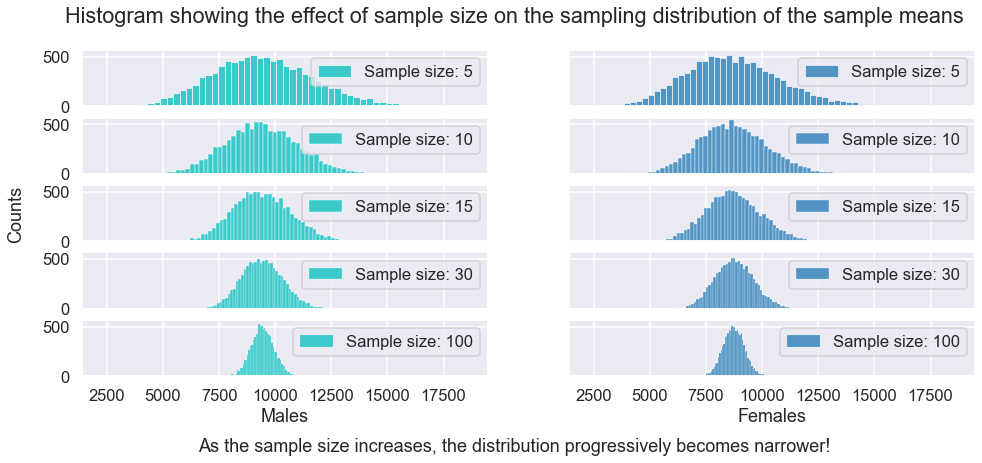

In [561]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,2, figsize=(16,6), sharex=True, sharey = True)
plt.suptitle('Histogram showing the effect of sample size on the sampling distribution of the sample means')

ax1[0] = sns.histplot(bootstrapped_means_per_transaction_males_5_10_15_30_100[0], ax=ax1[0], label = 'Sample size: 5', color='c')
ax1[0].legend()
ax1[0].set_ylabel(' ')


ax2[0] = sns.histplot(bootstrapped_means_per_transaction_males_5_10_15_30_100[1], ax=ax2[0], label = 'Sample size: 10', color='c')
ax2[0].legend()
ax2[0].set_ylabel(' ')


ax3[0] = sns.histplot(bootstrapped_means_per_transaction_males_5_10_15_30_100[2], ax=ax3[0], label = 'Sample size: 15', color='c')
ax3[0].legend()
ax3[0].set_ylabel(' ')


ax4[0] = sns.histplot(bootstrapped_means_per_transaction_males_5_10_15_30_100[3], ax=ax4[0], label = 'Sample size: 30', color='c')
ax4[0].legend()
ax4[0].set_ylabel(' ')

ax5[0] = sns.histplot(bootstrapped_means_per_transaction_males_5_10_15_30_100[4], ax=ax5[0], label = 'Sample size: 100', color='c')
ax5[0].legend()
ax5[0].set_ylabel(' ')

ax5[0].set_xlabel('Males')
# ax5[0].set_ylabel('Counts')


ax1[1] = sns.histplot(bootstrapped_means_per_transaction_females_5_10_15_30_100[0], ax=ax1[1], label = 'Sample size: 5')
ax1[1].legend()

ax2[1] = sns.histplot(bootstrapped_means_per_transaction_females_5_10_15_30_100[1], ax=ax2[1], label = 'Sample size: 10')
ax2[1].legend()

ax3[1] = sns.histplot(bootstrapped_means_per_transaction_females_5_10_15_30_100[2], ax=ax3[1], label = 'Sample size: 15')
ax3[1].legend()

ax4[1] = sns.histplot(bootstrapped_means_per_transaction_females_5_10_15_30_100[3], ax=ax4[1], label = 'Sample size: 30')
ax4[1].legend()

ax5[1] = sns.histplot(bootstrapped_means_per_transaction_females_5_10_15_30_100[4], ax=ax5[1], label = 'Sample size: 100')
ax5[1].legend()

ax5[1].set_xlabel('Females')

fig.text(0.5, -0.05, 'As the sample size increases, the distribution progressively becomes narrower!', ha='center')
fig.text(0.06, 0.5, 'Counts', va='center', rotation='vertical')

plt.show()

##### 

### Insights

- $\color{blue}{\text{As the sample size increases for each draw, the mean of the sample moves closer to the true mean of population.}}$

- $\color{blue}{\text{The sampling distribution of the sample means for spend per transaction becomes tigher around the mean (the variance decreases) as the sample size increases.}}$

- $\color{blue}{\text{The histogram of the sampling distribution of the sample means looks approximately normal for all the sample sizes considered in this analysis.}}$

- $\color{blue}{\text{The above observations are true for both males as well as females.}}$

##### 

### Computing the confidence intervals using the percentiles

95% CI for Males and Females are simply the 2.5th and 97.5th percentile of the sampling distribution of the sample means

In [284]:
males_CI_95_upper = np.percentile(bootstrapped_means_per_transaction_males, 97.5).round(2)
males_CI_95_lower = np.percentile(bootstrapped_means_per_transaction_males, 2.5).round(2)


females_CI_95_upper = np.percentile(bootstrapped_means_per_transaction_females, 97.5).round(2)
females_CI_95_lower = np.percentile(bootstrapped_means_per_transaction_females, 2.5).round(2)

In [287]:
print(f'The 95% confidence interval for purchase amount per transaction for males is {males_CI_95_lower, males_CI_95_upper}')

print(f'The 95% confidence interval for purchase amount per transaction for females is {females_CI_95_lower, females_CI_95_upper}')

The 95% confidence interval for purchase amount per transaction for males is (8443.56, 10433.97)
The 95% confidence interval for purchase amount per transaction for females is (7815.94, 9693.91)


##### 

### Computing the 95% CI using the mean and standard devidation of the sampling distribution of the sample means

In [312]:
## Males

bootstrapped_mean_males = np.mean(bootstrapped_means_per_transaction_males)

bootstrapped_std_dev_males = np.std(bootstrapped_means_per_transaction_males)

## Females

bootstrapped_mean_females = np.mean(bootstrapped_means_per_transaction_females)

bootstrapped_std_dev_females = np.std(bootstrapped_means_per_transaction_females)

In [313]:
norm.ppf(0.5)

0.0

In [304]:
z_score_95CI_upper = norm.ppf(0.975).round(2)
z_score_95CI_lower = norm.ppf(0.025).round(2)
z_score_95CI_lower, z_score_95CI_upper

(-1.96, 1.96)

In [314]:
CI_males_95 = (bootstrapped_mean_males + bootstrapped_std_dev_males * z_score_95CI_lower, bootstrapped_mean_males + bootstrapped_std_dev_males * z_score_95CI_upper)

CI_females_95 = (bootstrapped_mean_females + bootstrapped_std_dev_females * z_score_95CI_lower, bootstrapped_mean_females + bootstrapped_std_dev_females * z_score_95CI_upper)

print(f'95% CI for males for spending per transaction is: {CI_males_95}')

print(f'95% CI for females for spending per transaction is: {CI_females_95}')

95% CI for males for spending per transaction is: (8435.909968857724, 10427.789787142277)
95% CI for females for spending per transaction is: (7802.269638365145, 9665.356771634857)


### The confidnce intervals calculated using the percentiles or by the std dev of the sampling distribution of the sample means is similar (the differences are from the rounding)

##### 

### Compute the 90 and 99 percent CI for males and females with percentiles

In [318]:

#### Males  - 90% CI

males_CI_90_upper = np.percentile(bootstrapped_means_per_transaction_males, 95).round(2)
males_CI_90_lower = np.percentile(bootstrapped_means_per_transaction_males, 5).round(2)
print(f'90% CI for males for spending per transaction is: {males_CI_90_lower, males_CI_90_upper}')


####  Males - 99% CI
males_CI_99_upper = np.percentile(bootstrapped_means_per_transaction_males, 99.5).round(2)
males_CI_99_lower = np.percentile(bootstrapped_means_per_transaction_males, 0.5).round(2)
print(f'99% CI for males for spending per transaction is: {males_CI_99_lower, males_CI_99_upper}')

print('')
#### Males  - 90% CI

females_CI_90_upper = np.percentile(bootstrapped_means_per_transaction_females, 95).round(2)
females_CI_90_lower = np.percentile(bootstrapped_means_per_transaction_females, 5).round(2)
print(f'90% CI for females for spending per transaction is: {females_CI_90_lower, females_CI_90_upper}')


####  Males - 99% CI
females_CI_99_upper = np.percentile(bootstrapped_means_per_transaction_females, 99.5).round(2)
females_CI_99_lower = np.percentile(bootstrapped_means_per_transaction_females, 0.5).round(2)
print(f'99% CI for females for spending per transaction is: {females_CI_99_lower, females_CI_99_upper}')

90% CI for males for spending per transaction is: (8601.28, 10277.71)
99% CI for males for spending per transaction is: (8168.6, 10781.09)

90% CI for females for spending per transaction is: (7963.62, 9535.94)
99% CI for females for spending per transaction is: (7558.63, 9977.46)


##### 

## **Sampling distribution of the sampling means for males and females side-by-side**

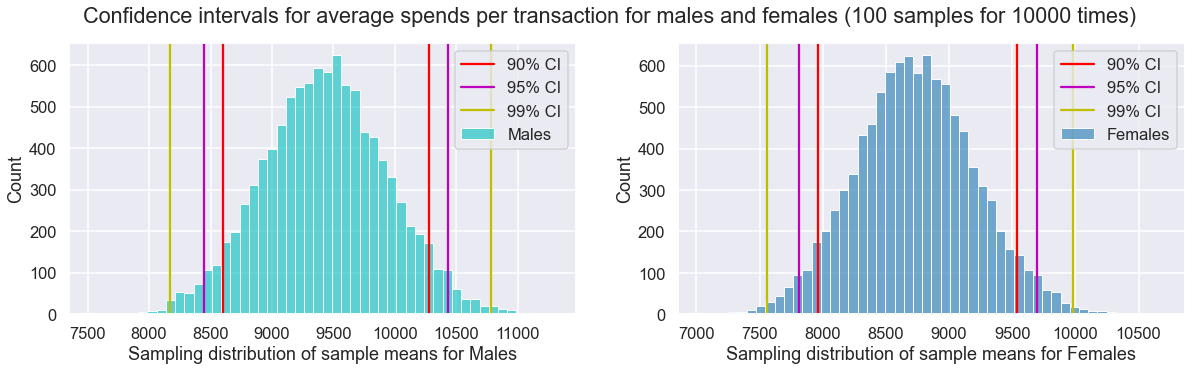

In [562]:
fig,(ax1, ax2) = plt.subplots(1,2, figsize=(20,5))
plt.suptitle('Confidence intervals for average spends per transaction for males and females (100 samples for 10000 times)')
males = sns.histplot(bootstrapped_means_per_transaction_males, bins=50, ax=ax1, label='Males', alpha=0.6, color='c')
males.set_xlabel('Sampling distribution of sample means for Males')

males.axvline(x = males_CI_90_upper, color = 'r', label = '90% CI')
males.axvline(x = males_CI_90_lower, color = 'r')

males.axvline(x = males_CI_95_upper, color = 'm', label = '95% CI')
males.axvline(x = males_CI_95_lower, color = 'm')

males.axvline(x = males_CI_99_upper, color = 'y', label = '99% CI')
males.axvline(x = males_CI_99_lower, color = 'y')

males.legend()

females = sns.histplot(bootstrapped_means_per_transaction_females, bins=50, ax=ax2, label='Females', alpha=0.6)
females.set_xlabel('Sampling distribution of sample means for Females')

females.axvline(x = females_CI_90_upper, color = 'r', label = '90% CI')
females.axvline(x = females_CI_90_lower, color = 'r')

females.axvline(x = females_CI_95_upper, color = 'm', label = '95% CI')
females.axvline(x = females_CI_95_lower, color = 'm')

females.axvline(x = females_CI_99_upper, color = 'y', label = '99% CI')
females.axvline(x = females_CI_99_lower, color = 'y')

females.legend()

plt.show()

### Insights

- $\color{blue}{\text{The average spending per transaction of males population may lie within USD (8601, 10277) with 90% confidence, (8435, 10427) with 95% confidence, USD (8168, 10781) with 99% confidence.}}$

- $\color{blue}{\text{The average spending per transaction of females population may lie within USD (7963, 9535) with 90% confidence, (7802, 9665) with 95% confidence, USD (7558, 9977) with 99% confidence.}}$

- $\color{blue}{\text{Naturally, as the amount of confidence (precision) gets higher, the interval accordingly gets bigger.}}$

In [552]:
sns.set_style('whitegrid')

In [194]:
df_user.head()

,User_ID,Gender,Age,City_Category,Marital_Status,Purchase
0,1000001,F,0-17,A,0,334093
1,1000002,M,55+,C,0,810472
2,1000003,M,26-35,A,0,341635
3,1000004,M,46-50,B,1,206468
4,1000005,M,26-35,A,1,821001


In [195]:
df_user.groupby('Gender')['Purchase'].mean()

Gender
F    712024.394958
M    925344.402367
Name: Purchase, dtype: float64

<AxesSubplot:xlabel='Purchase', ylabel='Gender'>

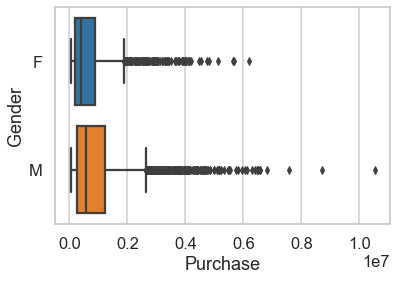

In [197]:
sns.boxplot(data=df_user, y='Gender', x='Purchase')

In [175]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [176]:
df[df['Gender'] == 'F']

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378
...,...,...,...,...,...,...,...,...,...,...
550061,1006029,P00372445,F,26-35,1,C,1,1,20,599
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [ ]:
df['']